In [1]:
#Import Libraries & Load Data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path ="D:\Data\Prediction_Data.xlsx"

sheet_name = 'Churn'

data = pd.read_excel(file_path,sheet_name=sheet_name)

In [3]:
data.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,17092-DEL,Female,78,Yes,Delhi,14,10,Deal 1,Yes,Yes,...,Credit Card,115.750000,8399.150391,0.0,110,2216.159912,10725.309570,Stayed,Others,Others
1,69498-TAM,Female,40,Yes,Tamil Nadu,7,15,Deal 1,Yes,Yes,...,Credit Card,95.150002,6770.850098,0.0,0,2451.629883,9222.480469,Stayed,Others,Others
2,42899-HAR,Male,40,No,Haryana,6,14,Deal 1,Yes,Yes,...,Credit Card,92.300003,6719.899902,0.0,0,978.479980,7698.379883,Stayed,Others,Others
3,28033-ASS,Female,51,Yes,Assam,5,20,NaN,Yes,Yes,...,Bank Withdrawal,84.050003,966.549988,0.0,0,214.199997,1180.750000,Stayed,Others,Others
4,43546-KAR,Male,21,Yes,Karnataka,7,2,Deal 2,Yes,Yes,...,Credit Card,89.099998,5411.649902,0.0,0,2340.500000,7752.149902,Stayed,Others,Others


# Data Preprocessing

In [4]:
# Drop columns that won't be used for prediction
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)


In [5]:
# List of columns to be label encoded
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]


In [6]:
data.head()

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status
0,Female,78,Yes,Delhi,14,10,Deal 1,Yes,Yes,Yes,...,Two Year,Yes,Credit Card,115.750000,8399.150391,0.0,110,2216.159912,10725.309570,Stayed
1,Female,40,Yes,Tamil Nadu,7,15,Deal 1,Yes,Yes,Yes,...,One Year,Yes,Credit Card,95.150002,6770.850098,0.0,0,2451.629883,9222.480469,Stayed
2,Male,40,No,Haryana,6,14,Deal 1,Yes,Yes,Yes,...,Two Year,No,Credit Card,92.300003,6719.899902,0.0,0,978.479980,7698.379883,Stayed
3,Female,51,Yes,Assam,5,20,NaN,Yes,Yes,Yes,...,Month-to-Month,Yes,Bank Withdrawal,84.050003,966.549988,0.0,0,214.199997,1180.750000,Stayed
4,Male,21,Yes,Karnataka,7,2,Deal 2,Yes,Yes,Yes,...,Two Year,Yes,Credit Card,89.099998,5411.649902,0.0,0,2340.500000,7752.149902,Stayed


In [7]:
# Encode categorical variables except the target variable
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])


In [8]:
data.head()

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status
0,0,78,1,4,14,10,0,1,1,1,...,2,1,1,115.750000,8399.150391,0.0,110,2216.159912,10725.309570,Stayed
1,0,40,1,17,7,15,0,1,1,1,...,1,1,1,95.150002,6770.850098,0.0,0,2451.629883,9222.480469,Stayed
2,1,40,0,6,6,14,0,1,1,1,...,2,0,1,92.300003,6719.899902,0.0,0,978.479980,7698.379883,Stayed
3,0,51,1,1,5,20,5,1,1,1,...,0,1,0,84.050003,966.549988,0.0,0,214.199997,1180.750000,Stayed
4,1,21,1,9,7,2,1,1,1,1,...,2,1,1,89.099998,5411.649902,0.0,0,2340.500000,7752.149902,Stayed


In [9]:
# Manually encode the target variable 'Customer_Status'
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})


In [10]:
# Split data into features and target
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']


In [11]:
print(X)

      Gender  Age  Married  State  Number_of_Referrals  Tenure_in_Months  \
0          0   78        1      4                   14                10   
1          0   40        1     17                    7                15   
2          1   40        0      6                    6                14   
3          0   51        1      1                    5                20   
4          1   21        1      9                    7                 2   
...      ...  ...      ...    ...                  ...               ...   
6002       0   40        0      6                    6                 8   
6003       0   64        1     16                   11                 3   
6004       1   46        1      9                   15                10   
6005       1   31        0     21                    2                 6   
6006       0   71        1      9                   11                34   

      Value_Deal  Phone_Service  Multiple_Lines  Internet_Service  ...  \
0            

In [12]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
6002    0
6003    0
6004    0
6005    0
6006    0
Name: Customer_Status, Length: 6007, dtype: int64


In [13]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train Random Forest Model


In [14]:
#initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100,random_state=42)

In [15]:
#Train the model
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

# Evaluate Model

In [16]:
#Make Predictions
y_pred = rf_model.predict(X_test)

In [17]:
#Evaluate the model
print("Confusion matrix: ")
print(confusion_matrix(y_test,y_pred))


Confusion matrix: 
[[810  59]
 [113 220]]


In [18]:
print("Classification Report: ")
print(classification_report(y_test,y_pred))

Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       869
           1       0.79      0.66      0.72       333

    accuracy                           0.86      1202
   macro avg       0.83      0.80      0.81      1202
weighted avg       0.85      0.86      0.85      1202



In [19]:
# Feature Selection using Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

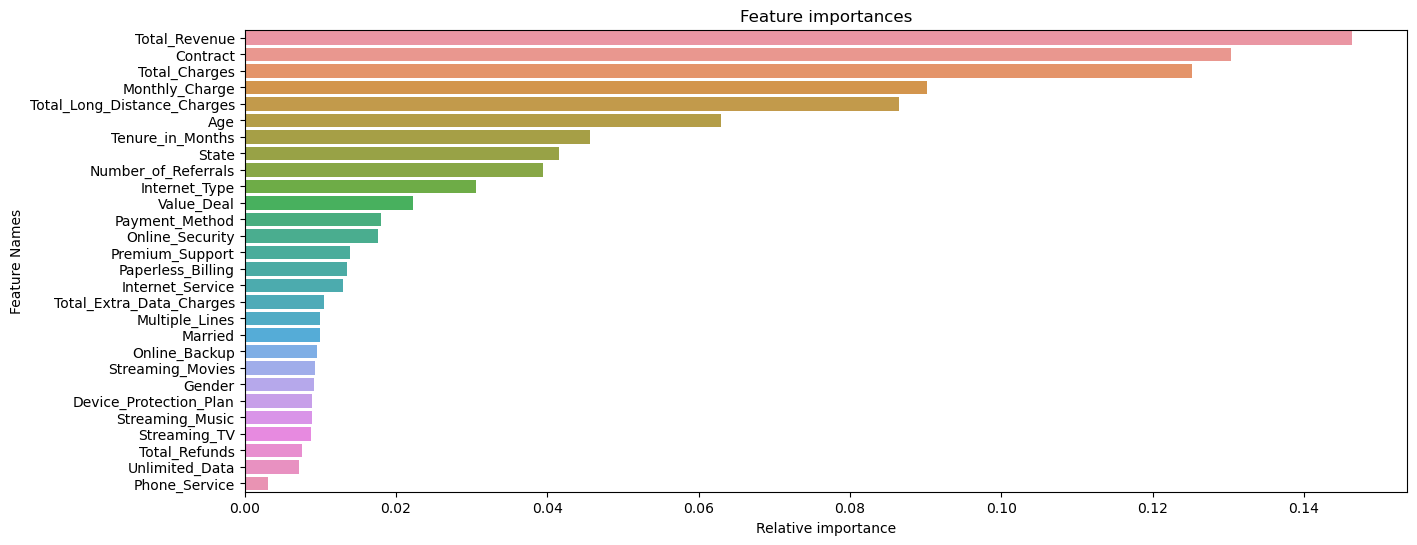

In [20]:
# plot the feature importances
plt.figure(figsize=(15,6))
sns.barplot(x=importances[indices],y=X.columns[indices])
plt.title('Feature importances')
plt.xlabel('Relative importance')
plt.ylabel('Feature Names')
plt.show()

# Use Model for Prediction on New Data

In [21]:
# load new dataset
file_path ="D:\Data\Prediction_Data.xlsx"
sheet_name = 'joined'
new_data = pd.read_excel(file_path,sheet_name=sheet_name)

In [22]:
# Displaying the first few rows
new_data.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,11751-TAM,Female,18,No,Tamil Nadu,5,7,Deal 5,No,No,...,Mailed Check,24.299999,38.450001,0.0,0,0.000000,38.450001,Joined,Others,Others
1,12056-WES,Male,27,No,West Bengal,2,20,NaN,Yes,No,...,Bank Withdrawal,90.400002,268.450012,0.0,0,94.440002,362.890015,Joined,Others,Others
2,12136-RAJ,Female,25,Yes,Rajasthan,2,35,NaN,Yes,No,...,Bank Withdrawal,19.900000,19.900000,0.0,0,11.830000,31.730000,Joined,Others,Others
3,12257-ASS,Female,39,No,Assam,9,1,NaN,Yes,No,...,Credit Card,19.549999,19.549999,0.0,0,10.200000,29.750000,Joined,Others,Others
4,12340-DEL,Female,51,Yes,Delhi,0,10,NaN,Yes,No,...,Credit Card,62.799999,62.799999,0.0,0,42.189999,104.989998,Joined,Others,Others


In [23]:
# Retain the original Data frame
original_data = new_data.copy()

In [25]:
# Retain the Customer_id column
customer_ids = new_data['Customer_ID']

In [26]:
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

In [27]:
# Encode categorical variables using the saved label encoders
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] =  label_encoders[column].transform(new_data[column])

In [28]:
#make Predictions
new_predictions = rf_model.predict(new_data)

In [29]:
# Adding Predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

In [30]:
# Filter the DataFrame to include only records predicted as "Churned"
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]


In [31]:
# Save the results
original_data.to_csv("D:\Data\Predictions.csv", index=False)

